In [47]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
import pickle
import lightgbm as lgb
import logging
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [27]:
train_all_features = pd.read_csv('preprocessed_data/train_all_features.csv')
train_selected_features = pd.read_csv('preprocessed_data/train_selected_features.csv')
test_all_features = pd.read_csv('preprocessed_data/test_all_features.csv')
test_selected_features = pd.read_csv('preprocessed_data/test_selected_features.csv')

In [28]:


# Dictionary for models
models_dict = {
    'lgbm': lgb.LGBMClassifier,
    'xgb': XGBClassifier,  # Replacing SVM with XGBoost
    'knn': KNeighborsClassifier
}

# Adjusted Dictionary for hyperparameter spaces with fewer options
model_spaces = {
    'lgbm': {
        'learning_rate': [0.1, 0.15, 0.2],   
        'num_leaves': [20, 40, 60],         
        'max_depth': [3, 4],                 
    },
    'xgb': {   # XGBoost hyperparameters
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],       
    }
}

def optimize_and_save_model(model_name, space, df,data_type):
    df.columns = ["".join(e for e in col if e.isalnum() or e == '_') for col in df.columns]
    X = df.iloc[: ,:-1]
    y = df.iloc[:,-1]
    model = models_dict[model_name]()
    
    search = RandomizedSearchCV(model, param_distributions=space, 
                                n_iter=10, scoring='f1_micro', 
                                cv=3, n_jobs=-1, verbose=1)
    
    search.fit(X, y)
    
    # Train and save the best model
    best_model = search.best_estimator_
    joblib.dump(best_model, f'{model_name}_{data_type}best_model.pkl')
    
    # Return the results
    best_f1 = search.best_score_
    best_params = search.best_params_
    
    return {
        'model': model_name,
        'f1_score': best_f1,
        'best_hyperparameters': best_params
    }


In [29]:
results_selected = []
for model_name in ['lgbm', 'xgb', 'knn']:
    print(model_name)
    result = optimize_and_save_model(model_name, model_spaces[model_name], train_selected_features,'selected_features')
    results_selected.append(result)

lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 76324, number of used features: 76
[LightGBM] [Info] Start training from score -0.617812
[LightGBM] [Info] Start training from score -1.051898
[LightGBM] [Info] Start training from score -2.192806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [30]:
results = []
for model_name in ['lgbm', 'xgb', 'knn']:
    print(model_name)
    result = optimize_and_save_model(model_name, model_spaces[model_name], train_all_features,'all_features')
    results.append(result)

lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1245
[LightGBM] [Info] Number of data points in the train set: 76324, number of used features: 136
[LightGBM] [Info] Start training from score -0.617812
[LightGBM] [Info] Start training from score -1.051898
[LightGBM] [Info] Start training from score -2.192806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [31]:
results_selected

[{'model': 'lgbm',
  'f1_score': 0.5934044112743432,
  'best_hyperparameters': {'num_leaves': 40,
   'max_depth': 4,
   'learning_rate': 0.2}},
 {'model': 'xgb',
  'f1_score': 0.5937712855235481,
  'best_hyperparameters': {'subsample': 1.0,
   'n_estimators': 200,
   'max_depth': 3,
   'learning_rate': 0.5,
   'colsample_bytree': 1.0}},
 {'model': 'knn',
  'f1_score': 0.5193517349937976,
  'best_hyperparameters': {'n_neighbors': 9}}]

In [32]:
results

[{'model': 'lgbm',
  'f1_score': 0.5936009315548988,
  'best_hyperparameters': {'num_leaves': 20,
   'max_depth': 4,
   'learning_rate': 0.2}},
 {'model': 'xgb',
  'f1_score': 0.5947801351206099,
  'best_hyperparameters': {'subsample': 0.7,
   'n_estimators': 500,
   'max_depth': 4,
   'learning_rate': 0.1,
   'colsample_bytree': 0.7}},
 {'model': 'knn',
  'f1_score': 0.5189979521402819,
  'best_hyperparameters': {'n_neighbors': 9}}]

In [33]:
import joblib

model = joblib.load('lgbm_all_featuresbest_model.pkl')

In [34]:
preds = model.predict(test_all_features.iloc[:,-1])

ValueError: Expected 2D array, got 1D array instead:
array=[2 1 1 ... 1 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 50883, number of used features: 129
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Info] Start training from score -1.051905
[LightGBM] [Info] Start training from score -2.192754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [35]:
results

[{'model': 'lgbm',
  'f1_score': 0.5936009315548988,
  'best_hyperparameters': {'num_leaves': 20,
   'max_depth': 4,
   'learning_rate': 0.2}},
 {'model': 'xgb',
  'f1_score': 0.5947801351206099,
  'best_hyperparameters': {'subsample': 0.7,
   'n_estimators': 500,
   'max_depth': 4,
   'learning_rate': 0.1,
   'colsample_bytree': 0.7}},
 {'model': 'knn',
  'f1_score': 0.5189979521402819,
  'best_hyperparameters': {'n_neighbors': 9}}]

In [36]:
results_selected

[{'model': 'lgbm',
  'f1_score': 0.5934044112743432,
  'best_hyperparameters': {'num_leaves': 40,
   'max_depth': 4,
   'learning_rate': 0.2}},
 {'model': 'xgb',
  'f1_score': 0.5937712855235481,
  'best_hyperparameters': {'subsample': 1.0,
   'n_estimators': 200,
   'max_depth': 3,
   'learning_rate': 0.5,
   'colsample_bytree': 1.0}},
 {'model': 'knn',
  'f1_score': 0.5193517349937976,
  'best_hyperparameters': {'n_neighbors': 9}}]

In [37]:
import joblib

model = joblib.load('xgb_all_featuresbest_model.pkl')

In [42]:
test_all_features.columns = ["".join(e for e in col if e.isalnum() or e == '_') for col in test_all_features.columns]
X = test_all_features.iloc[: ,:-1]
y = test_all_features.iloc[:,-1]

In [43]:
preds = model.predict(X)
preds

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
test_all_features['preds'] = preds

F1 Micro Score: 0.5961009354610487


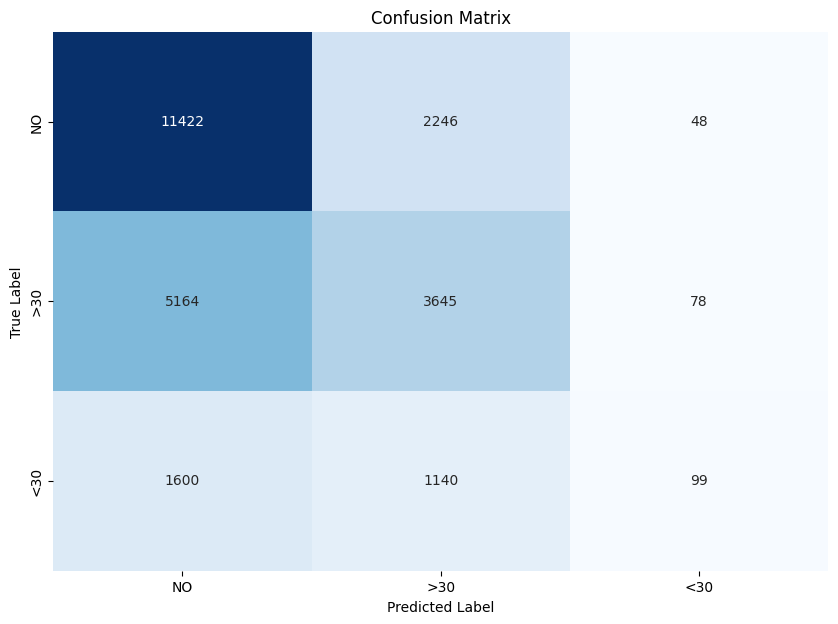

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Calculate the confusion matrix
matrix = confusion_matrix(test_all_features['readmitted'], test_all_features['preds'])

# Calculate the f1_micro score
score = f1_score(test_all_features['readmitted'], test_all_features['preds'], average='micro')
print(f"F1 Micro Score: {score}")

# Define the labels
labels = ['NO', '>30', '<30']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            yticklabels=labels, xticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The results are not amazing, I will check if downsampled data will lead to better model

In [54]:
downsampled_train_all_features = pd.read_csv('preprocessed_data/downsampled_train_all_features.csv')
downsampled_df_selected_features = pd.read_csv('preprocessed_data/downsampled_train_selected_features.csv')

In [55]:
results_selected_downsampled = []
for model_name in ['lgbm', 'xgb', 'knn']:
    print(model_name)
    result = optimize_and_save_model(model_name, model_spaces[model_name], downsampled_df_selected_features,'selected_features_downsampled_')
    results_selected_downsampled.append(result)

lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 25554, number of used features: 73
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [56]:
results_all_downsampled = []
for model_name in ['lgbm', 'xgb', 'knn']:
    print(model_name)
    result = optimize_and_save_model(model_name, model_spaces[model_name], downsampled_train_all_features,'all_features_downsampled_')
    results_all_downsampled.append(result)

lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 25554, number of used features: 118
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [57]:
results_selected_downsampled

[{'model': 'lgbm',
  'f1_score': 0.4685763481255381,
  'best_hyperparameters': {'num_leaves': 40,
   'max_depth': 4,
   'learning_rate': 0.2}},
 {'model': 'xgb',
  'f1_score': 0.4722157000860922,
  'best_hyperparameters': {'subsample': 0.7,
   'n_estimators': 100,
   'max_depth': 6,
   'learning_rate': 0.1,
   'colsample_bytree': 0.5}},
 {'model': 'knn',
  'f1_score': 0.3683180715347891,
  'best_hyperparameters': {'n_neighbors': 7}}]

In [60]:
print(results_all_downsampled)

[{'model': 'lgbm', 'f1_score': 0.4705329889645457, 'best_hyperparameters': {'num_leaves': 40, 'max_depth': 4, 'learning_rate': 0.1}}, {'model': 'xgb', 'f1_score': 0.47315488768881586, 'best_hyperparameters': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5}}, {'model': 'knn', 'f1_score': 0.3700790482898959, 'best_hyperparameters': {'n_neighbors': 7}}]
